In [12]:
import re
import csv
import nltk
import numpy as np
import pandas as pd
nltk.download('words')
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from nltk.corpus import words
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [157]:
input_file = "passwords.csv"
filepath = "formatted_passwords.csv"
encoding='cp850'

with open(input_file, "r", encoding=encoding) as infile, open(filepath, "w",  encoding=encoding) as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    for line in reader:
        newline = [','.join(line[:-1])] + line[-1:]
        writer.writerow(newline)

In [13]:
filepath = "formatted_passwords.csv"
encoding='cp850'
df = pd.read_csv(filepath, encoding=encoding)

In [14]:
df.shape

(669879, 2)

In [15]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [163]:
df.isnull().sum().sum()

1

In [164]:
df[df.isnull().any(axis=1)]

,password,strength
367718,NaN,0


In [16]:
df.fillna(" ", inplace=True)

In [ ]:
1. Tf-idf scores 
2. password lengths
3. number of special characters used 
4. number of digits used
5. number of capitalization used
5. COntains dictionary word

In [ ]:
def getTokens(string): 
    '''
    Our custom tokenizer performs tokenization on characters rather than words
    '''
    tokens = []
    for char in string:
        tokens.append(char)
    return tokens

In [174]:
# creating new column for password length 
# passing values through str.len() 
df["password_length"]= df["password"].str.len() 
df['special_characters'] = df['password'].str.count(r'[^a-zA-Z0-9 ]')
df['no_of_digits'] = df['password'].str.count(r'[0-9]')
df['capitalized_alphabets'] = df['password'].str.count(r'[A-Z]')

In [1]:
from nltk.corpus import words
# if "hello" in set(words.words())

In [ ]:
# import nltk
# nltk.download('words')
has_word = []
for psswrd in set(df.password):
    count = 0
    for k in set(words.words()):
        if k.lower() in psswrd.lower():
            count+=1
    if count > 0:
        has_word.append("1")
    else: 
        has_word.append("0")
        
        
#     set(words.words())

In [ ]:
# from nltk.corpus import wordnet

# if not wordnet.synsets(word_to_test):
#   #Not an English Word
# else:
#   #English Word

In [ ]:
# import enchant
# d = enchant.Dict('en_US')

# text = 'huwefggthisisastringhef'
# l = len(text)

# for i in range(l):
#     for j in range(i+3, l+1):
#         if d.check(text[i:j]):
#             print(text[i:j])

In [177]:
df.tail(10)

,password,strength,password_length,special_characters,no_of_digits,capitalized_alphabets
669869,mywude577,1,9,0,3,0
669870,8rp4PTTM1MAlcLw0,2,16,0,4,7
669871,hattrick9,1,9,0,1,0
669872,lanciau01,1,9,0,2,0
669873,sh4tup,0,6,0,1,0
669874,10redtux10,1,10,0,4,0
669875,infrared1,1,9,0,1,0
669876,184520socram,1,12,0,6,0
669877,marken22a,1,9,0,2,0
669878,fxx4pw4g,1,8,0,2,0


### Split the data into train & test sets:

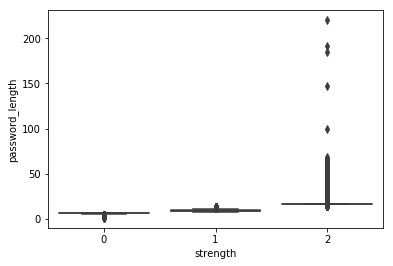

In [229]:
import seaborn as sns
sns.boxplot("strength", "password_length", data=df)
plt.show()

In [214]:
X = df.drop('strength', axis=1)
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [187]:
y.value_counts()

1    496801
0     89702
2     83376
Name: strength, dtype: int64

<font color=red>496801 out of 669879 passwords (or 74.16%) are Level 0. This means that any classification model we create has to perform **better than 74.16%** to beat random chance.</font>

### Logistic Regression

In [233]:
X_train.head()

,password,password_length,special_characters,no_of_digits,capitalized_alphabets
408422,lucas2114,9,0,4,0
82141,3mberr,6,0,1,0
98475,thunder16,9,0,2,0
522553,superman12310,13,0,5,0
262521,arda12301,9,0,5,0


In [234]:
lr = LogisticRegression(penalty = 'l2', class_weight='balanced')
lr.fit(X_train.drop("password", axis=1), y_train)
prediction = lr.predict(X_test.drop("password", axis=1))

C:\Users\dubem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dubem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [236]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29529
           1       1.00      0.99      1.00    163873
           2       0.98      0.98      0.98     27659

   micro avg       0.99      0.99      0.99    221061
   macro avg       0.99      0.99      0.99    221061
weighted avg       0.99      0.99      0.99    221061



In [237]:
print(accuracy_score(y_test, prediction))

0.9930019315935421


### Calculate Tf-idf score using TfidfVectorizer

In [215]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train["password"])
X_train_tfidf.shape

(448818, 451801)

### Logistic Regression using only Tf-idf score

In [220]:
password_clf = Pipeline([('tfidf', TfidfVectorizer()),
                         ('lr', LogisticRegression(penalty='l2', class_weight='balanced')),
                        ])

# Feed the training data through the pipeline
password_clf.fit(X_train["password"], y_train)

C:\Users\dubem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dubem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

### Test the classifier and display results

In [221]:
# Form a prediction set
predictions = password_clf.predict(X_test["password"])

In [222]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.01      0.01     29529
           1       0.75      1.00      0.85    163873
           2       0.75      0.04      0.08     27659

   micro avg       0.75      0.75      0.75    221061
   macro avg       0.75      0.35      0.31    221061
weighted avg       0.75      0.75      0.64    221061



In [223]:
print(accuracy_score(y_test, predictions))

0.7457805764019886


### Combining Tf-idf and dataframe

In [200]:
from pyspark.mllib.linalg import Vectors

In [204]:
from scipy.sparse import csr_matrix, hstack

<448818x4 sparse matrix of type '<class 'numpy.int64'>'
	with 964569 stored elements in Compressed Sparse Row format>

In [205]:
X_train.drop('password', axis=1, inplace=True)
X_train2 = hstack([X_train_tfidf, csr_matrix(X_train.values)])

In [207]:
X_train2.shape

(448818, 451805)

In [209]:
lr = LogisticRegression(penalty='l2', multi_class='ovr')
lr.fit(X_train2, y_train)

C:\Users\dubem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [210]:
X_test_tfidf = vectorizer.fit_transform(X_test["password"])

In [211]:
X_test.drop('password', axis=1, inplace=True)
X_test2 = hstack([X_test_tfidf, csr_matrix(X_test.values)])

C:\Users\dubem\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [224]:
# predictions = lr.predict(X_test2)